<a href="https://colab.research.google.com/github/ahmed99abdalla/AhmedAbdalla.github.io/blob/main/Neural_Network_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Solution

## Ahmed Abdalla
## Grand Canyon University
## DSC-550-O500
## Dr.Ali Wahid
### November 22, 2023


The stock market is a global platform to buy and sell stock from different companies and public businesses, brokers use the fluctuation in the stock prices to make a profit (sell high buy low), stock prices depend on how well the company is doing and the projection for that success, it also influenced by the domestic and international economy.


Correctly anticipating a dip or rise in the market is the goal of stockbrokers, to be able to make a profit, I will try to build a deep learning model to help investors anticipate the future price using previous stock prices (open, high, low, close, volume).


Predicting stock prices using deep learning typically involves using algorithms such as RNN, long short-term memory networks (LSTMs), after data collection there will be no need for some processes such as feature selection, cleaning the dataset and managing anomalies and outliers.
After splitting the dataset into training and testing datasets and normalizing the dataset, I will be using a long short term memory model to make predictions.


I will be using data from yahoo finance for Alphabet stock prices from 2010 to 2023, There are five columns. The Open column tells the price at which a stock started trading when the market opened on a particular day. The Close column refers to the price of an individual stock when the stock exchange closed the market for the day. The High column depicts the highest price at which a stock traded during a period. The Low column tells the lowest price of the period. Volume is the total amount of trading activity during a period of time, and the date column will be used as an index.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

In [ ]:
data = pd.read_csv("GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


<Axes: >

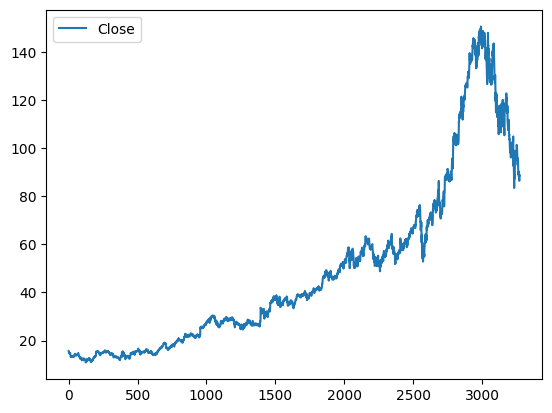

In [ ]:
data.plot.line(y="Close", use_index=True)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
window_size = 31

In [ ]:
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size + 1):  # Adjusted loop range
        sequence = data[i : i + window_size]
        sequences.append(sequence)
    return np.array(sequences)

# Create sequences of data
sequences = create_sequences(scaled_data, window_size)

# Split data into training and testing sets
train_size = int(0.8 * len(sequences))
train_data = sequences[:train_size]
test_data = sequences[train_size:]

In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, data.shape[1]), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [33]:
model.fit(train_data[:, :-1], train_data[:, -1], epochs=10, batch_size=32)


In [ ]:
predictions = model.predict(test_data[:, :-1])


predictions = scaler.inverse_transform(predictions)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(data[-len(predictions):], predictions))
print(f'RMSE: {rmse}')